# Inspired by this code : https://github.com/znah/notebooks/blob/master/TV_denoise.ipynb

In [25]:
pip install brisque


Note: you may need to restart the kernel to use updated packages.


In [2]:
import scipy.io 
import numpy as np
import matplotlib.pyplot as plt

def nabla(I):
    h, w = I.shape
    G = np.zeros((h, w, 2), I.dtype)
    G[:, :-1, 0] -= I[:, :-1]
    G[:, :-1, 0] += I[:, 1:]
    G[:-1, :, 1] -= I[:-1]
    G[:-1, :, 1] += I[1:]
    return G

def nablaT(G):
    h, w = G.shape[:2]
    I = np.zeros((h, w), G.dtype)
    # note that we just reversed left and right sides
    # of each line to obtain the transposed operator
    I[:, :-1] -= G[:, :-1, 0]
    I[:, 1: ] += G[:, :-1, 0]
    I[:-1]    -= G[:-1, :, 1]
    I[1: ]    += G[:-1, :, 1]
    return I
     # little auxiliary routine
def anorm(x):
    '''Calculate L2 norm over the last array dimention'''
    return np.sqrt((x*x).sum(-1))

def calc_energy_ROF(X, observation, clambda):
    Ereg = anorm(nabla(X)).sum()
    Edata = 0.5 * clambda * ((X - observation)**2).sum()
    return Ereg + Edata

def calc_energy_TVL1(X, observation, clambda):
    Ereg = anorm(nabla(X)).sum()
    Edata = clambda * np.abs(X - observation).sum()
    return Ereg + Edata

# some reasonable lambdas
lambda_ROF = 8.0
lambda_TVL1 = 1.0






     

In [6]:
pip install image-quality

  Using cached image_quality-1.2.7-py3-none-any.whl.metadata (4.0 kB)
Using cached image_quality-1.2.7-py3-none-any.whl (146 kB)
Note: you may need to restart the kernel to use updated packages.


279.51 281.04 245.91 229.85 219.84 211.26 205.18 201.76 197.94 195.24 192.52 190.73 189.21 187.66 186.43 184.96 184.27 183.36 182.66 182.05 181.64 180.70 180.34 179.94 179.53 179.09 178.75 178.60 178.11 177.79 177.67 177.33 177.30 177.01 176.70 176.76 176.41 176.24 176.14 176.07 175.96 175.70 175.73 175.60 175.46 175.44 175.24 175.19 175.10 174.98 174.98 174.93 174.73 174.78 174.74 174.62 174.58 174.56 174.46 174.38 174.47 174.34 174.28 174.18 174.26 174.21 174.10 174.10 174.11 174.02 173.97 173.98 173.96 173.88 173.91 173.88 173.84 173.82 173.82 173.79 173.73 173.71 173.74 173.74 173.67 173.68 173.70 173.59 173.60 173.64 173.56 173.56 173.59 173.58 173.51 173.51 173.56 173.52 173.42 173.47 
190.00 193.73 163.05 149.39 139.77 131.97 127.33 123.29 120.19 117.08 114.96 112.77 111.32 109.95 108.70 107.57 106.77 105.69 104.99 104.31 103.79 103.29 102.58 102.08 101.62 101.42 101.06 100.51 100.25 99.89 99.82 99.41 99.18 99.04 98.82 98.68 98.40 98.27 98.17 97.99 97.79 97.71 97.66 97.39 97.31 

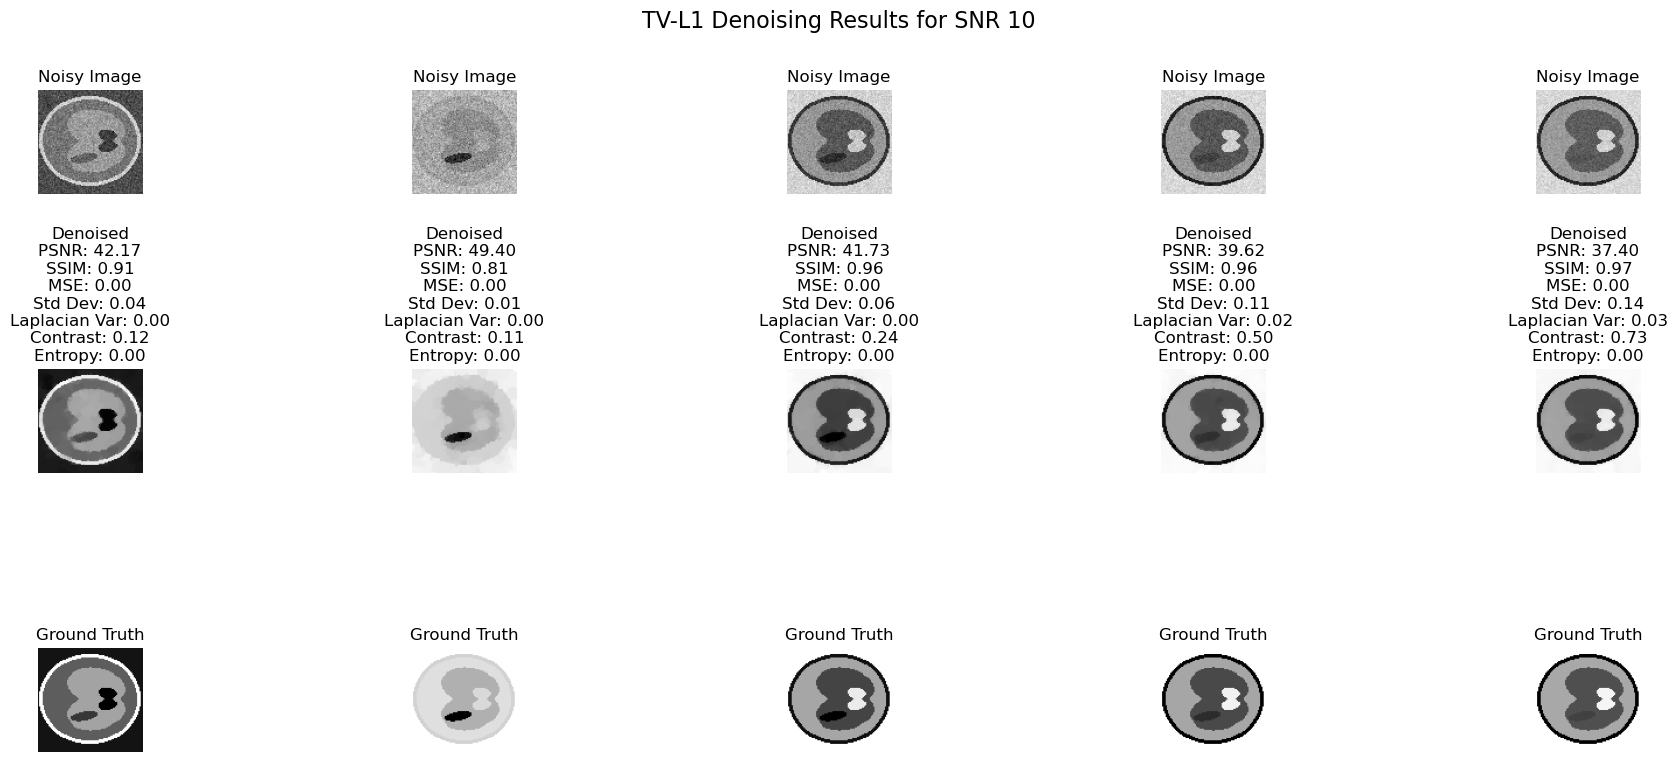

<Figure size 640x480 with 0 Axes>

396.12 416.86 374.59 338.80 321.40 308.49 300.72 292.58 286.04 282.01 277.61 275.50 272.13 269.42 267.70 266.19 264.76 263.47 262.14 261.18 260.40 259.46 258.72 257.86 257.34 257.06 256.58 255.88 255.72 255.11 254.84 254.37 254.14 253.84 253.49 253.37 253.06 252.83 252.53 252.66 252.25 252.03 252.16 251.93 251.55 251.55 251.45 251.41 251.22 251.11 251.11 251.05 250.79 250.81 250.80 250.64 250.59 250.60 250.42 250.44 250.38 250.26 250.35 250.14 250.13 250.15 250.05 250.02 249.97 249.94 249.98 249.91 249.78 249.81 249.75 249.74 249.74 249.72 249.62 249.65 249.58 249.58 249.64 249.53 249.53 249.54 249.48 249.44 249.51 249.43 249.44 249.40 249.34 249.37 249.37 249.32 249.31 249.29 249.28 249.27 
307.57 310.81 277.80 247.39 232.75 219.29 209.97 203.34 197.08 192.82 189.43 185.59 182.69 180.90 179.07 177.27 175.29 173.94 172.77 171.70 170.78 169.87 168.98 168.44 167.52 166.94 166.72 166.09 165.50 165.20 164.59 164.50 164.06 163.75 163.55 163.09 162.89 162.67 162.38 162.22 162.05 161.86 161.6

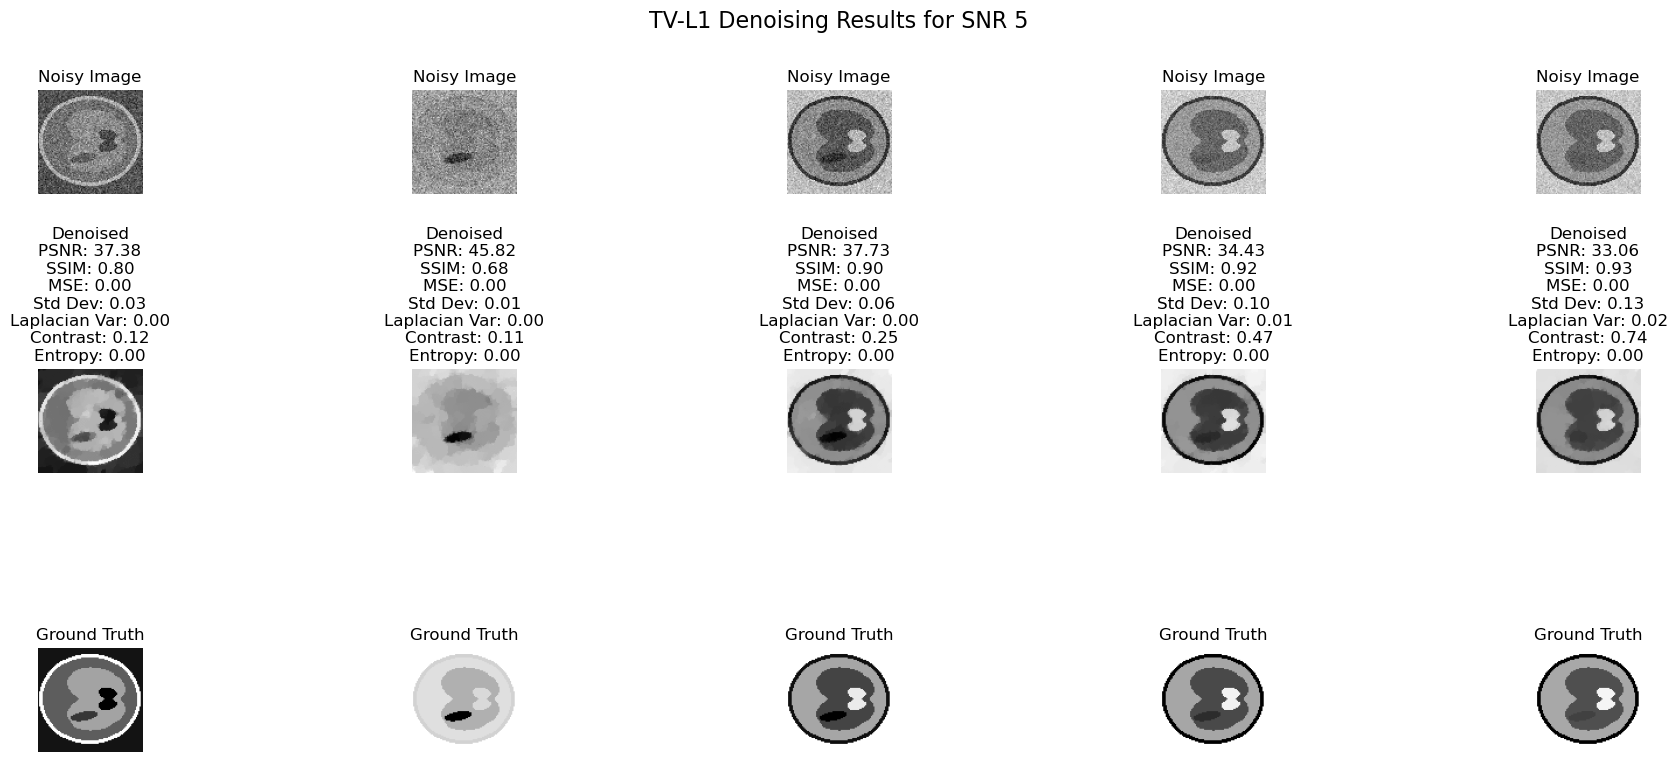

<Figure size 640x480 with 0 Axes>

449.62 500.12 441.60 405.65 383.75 367.61 354.44 346.31 338.68 334.94 329.92 326.29 323.02 319.90 317.38 315.91 313.86 312.59 311.29 310.12 309.07 307.99 306.90 306.51 305.56 304.81 304.48 303.74 303.39 302.89 302.54 301.95 301.66 301.54 301.11 300.80 300.58 300.25 300.08 300.00 299.80 299.52 299.24 299.25 299.12 298.80 298.78 298.72 298.66 298.54 298.28 298.12 298.12 298.07 298.00 297.91 297.75 297.71 297.77 297.63 297.58 297.51 297.34 297.45 297.36 297.34 297.19 297.18 297.27 297.05 297.06 297.11 296.94 296.98 296.85 296.90 296.89 296.83 296.77 296.66 296.86 296.75 296.67 296.63 296.49 296.65 296.68 296.57 296.52 296.44 296.45 296.55 296.54 296.41 296.35 296.39 296.43 296.42 296.40 296.24 
365.35 387.91 347.27 308.16 290.61 273.97 263.09 255.70 247.85 242.32 237.95 234.38 230.73 228.12 225.04 222.80 221.56 219.24 218.53 216.96 215.63 215.30 213.99 213.00 212.39 211.70 210.90 210.34 209.96 209.46 208.83 208.38 208.22 207.80 207.52 207.20 206.87 206.65 206.50 206.16 206.02 205.74 205.5

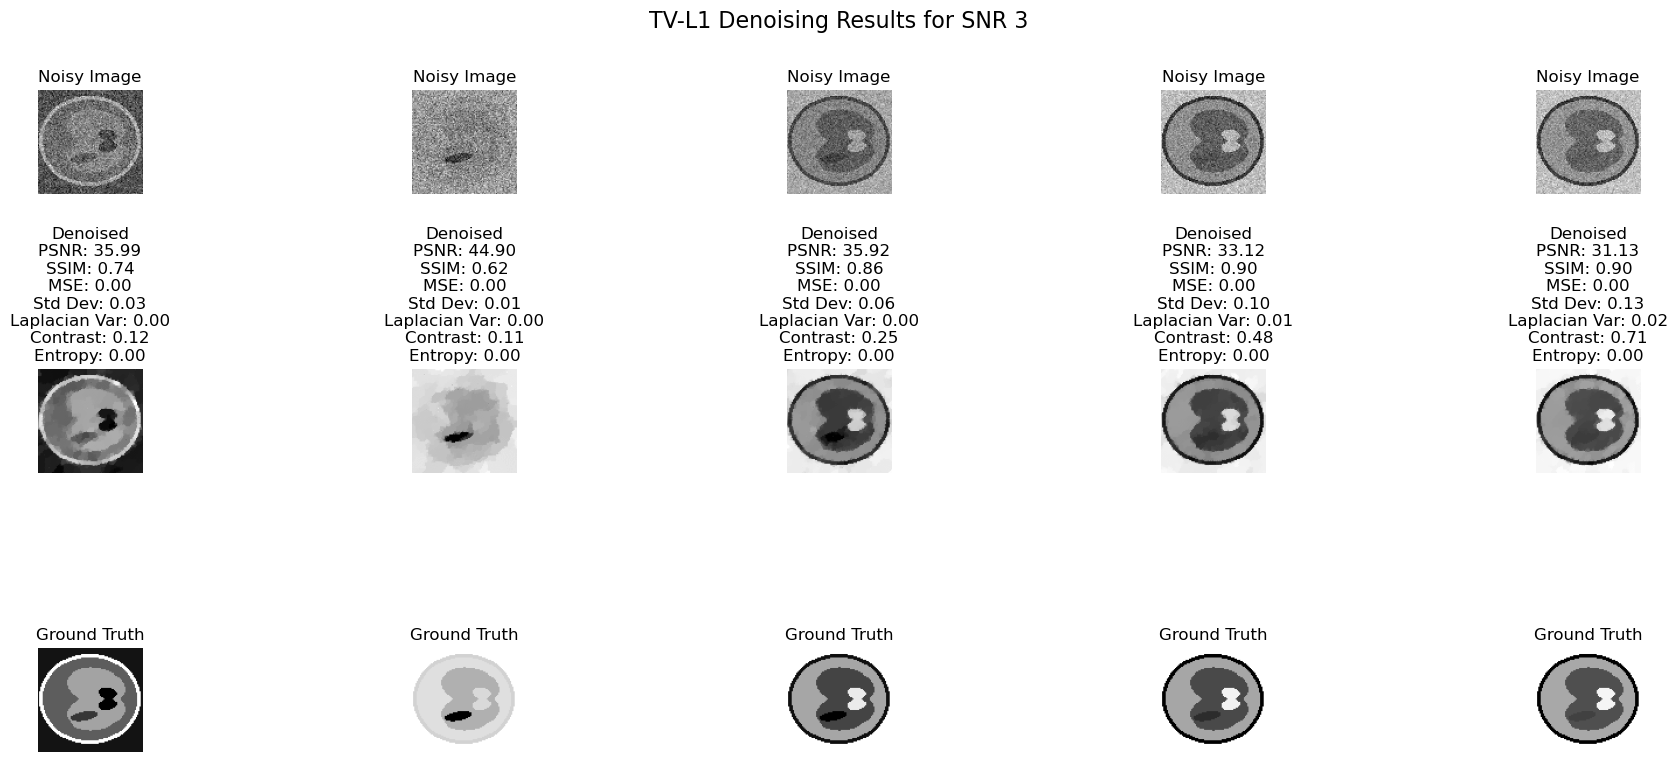

<Figure size 640x480 with 0 Axes>

506.04 573.51 512.46 463.68 443.70 424.11 409.79 400.92 393.79 387.01 382.24 378.27 374.47 371.52 369.24 367.27 364.79 362.95 361.94 360.50 358.98 357.99 357.15 356.22 355.51 354.94 354.28 353.63 353.02 352.81 352.23 351.97 351.47 351.09 350.63 350.53 350.34 349.73 349.84 349.54 349.39 349.20 348.93 348.63 348.47 348.37 348.42 348.14 347.89 348.08 347.66 347.68 347.68 347.40 347.19 347.36 347.26 347.06 346.88 346.66 346.84 346.77 346.69 346.57 346.68 346.25 346.49 346.46 346.23 346.27 346.23 346.17 346.11 346.21 346.15 346.00 345.96 345.93 345.90 345.94 345.77 345.77 345.81 345.86 345.79 345.58 345.61 345.59 345.62 345.61 345.66 345.53 345.47 345.43 345.51 345.50 345.42 345.45 345.38 345.37 
420.82 485.77 425.68 383.44 361.11 343.91 328.39 318.97 310.19 302.82 296.46 293.05 288.00 284.42 282.37 278.92 276.91 275.24 273.03 271.63 269.94 269.01 268.28 266.78 265.74 265.01 264.66 263.89 262.92 262.20 261.90 261.24 260.87 260.20 259.72 259.65 259.28 258.97 258.59 258.30 258.05 257.58 257.3

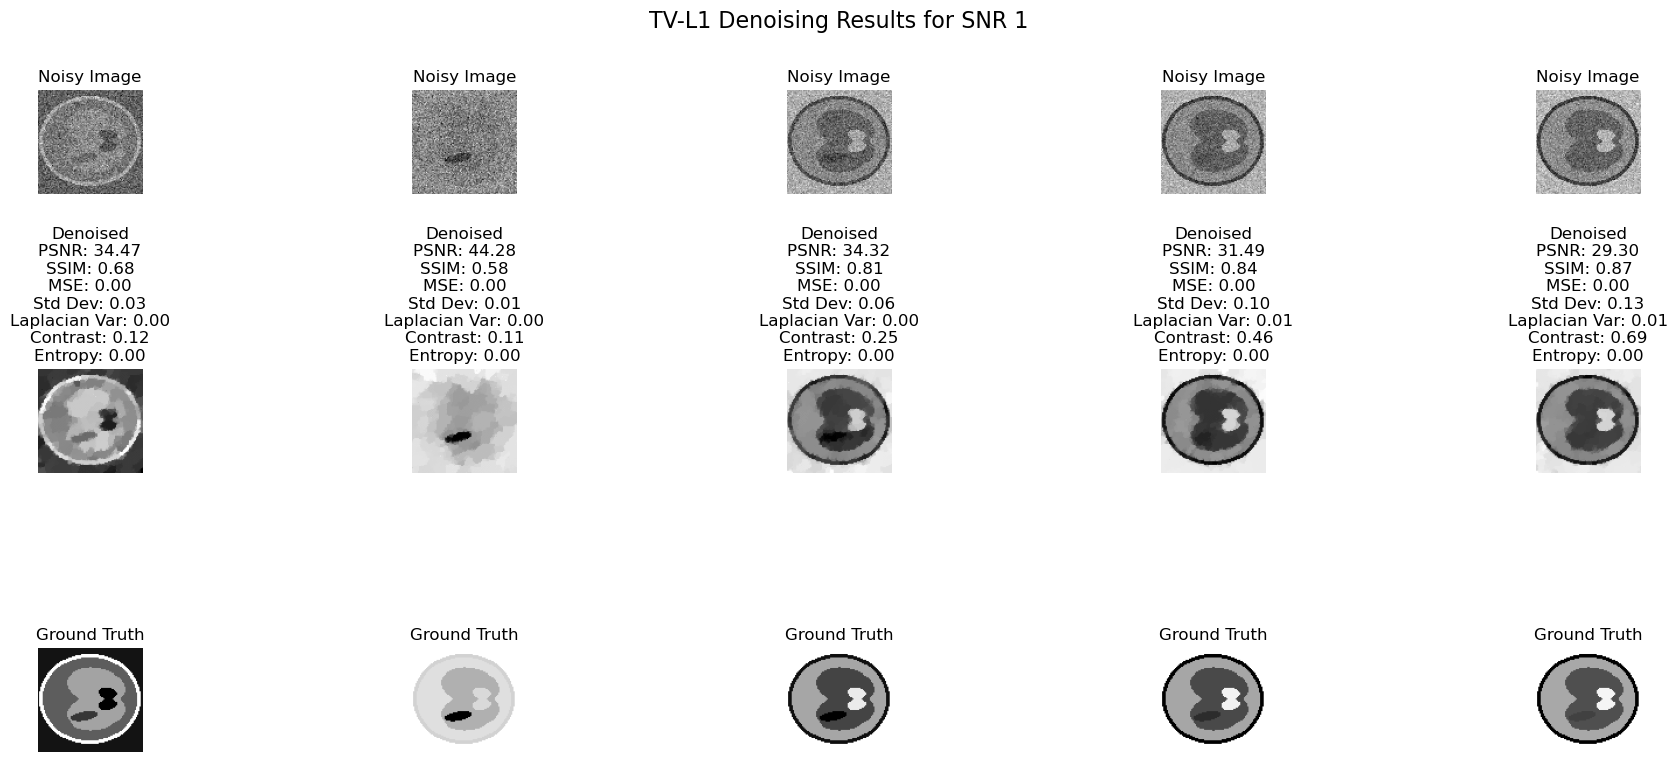

<Figure size 640x480 with 0 Axes>

552.10 641.62 572.59 519.28 491.48 475.22 460.13 447.47 439.11 432.05 426.05 421.24 417.21 414.37 411.17 408.72 406.35 403.80 402.45 401.35 398.65 397.98 397.23 395.90 395.16 394.44 393.79 393.05 392.19 391.95 391.39 390.77 390.54 390.20 389.64 389.42 389.11 388.83 388.48 388.29 387.95 387.85 387.62 387.36 387.02 386.94 386.87 386.64 386.48 386.34 386.33 386.28 385.93 385.93 385.76 385.59 385.61 385.69 385.47 385.27 385.25 385.09 385.23 385.06 384.94 384.90 384.81 384.75 384.72 384.61 384.68 384.50 384.48 384.37 384.39 384.38 384.38 384.38 384.21 384.18 384.21 384.15 384.15 384.09 384.13 384.01 383.99 384.01 383.94 383.95 383.90 383.87 383.83 383.78 383.82 383.85 383.82 383.64 383.70 383.82 
452.40 532.19 467.95 420.12 397.06 379.19 365.26 351.23 342.94 336.00 329.40 324.32 320.54 316.27 312.92 310.08 307.62 305.90 303.86 301.81 300.24 298.85 297.68 296.51 295.55 294.25 293.37 292.79 291.88 290.98 290.65 289.96 289.75 288.87 288.46 288.25 287.64 287.34 286.93 286.67 286.27 286.18 285.9

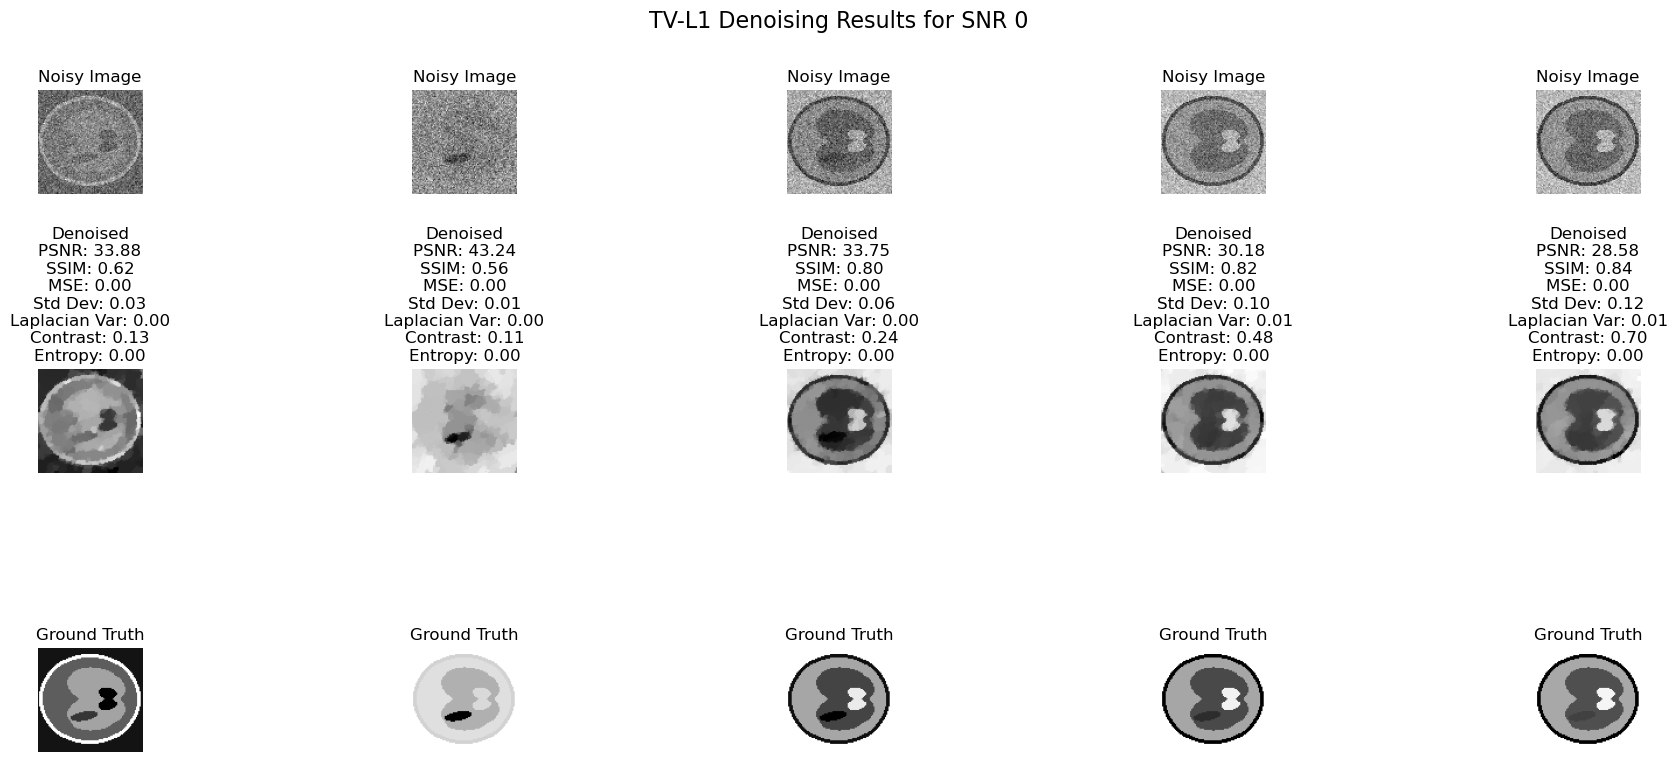

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from scipy.stats import entropy as scipy_entropy
from skimage.filters import laplace

import os





def compute_nr_iqa(image):
    """
    Calculates no-reference image quality assessment (NR-IQA) features for a given image.

    Args:
        image (np.ndarray): The grayscale image for which to calculate NR-IQA features.

    Returns:
        dict: A dictionary containing the calculated NR-IQA features:
            - Standard Deviation: Standard deviation of pixel intensity values.
            - Laplacian Variance: Variance of the Laplacian filter applied to the image.
            - Contrast (Michelson): Michelson contrast measure based on minimum and maximum intensities.
            - Entropy: Image entropy calculated using skimage.metrics.entropy.
    """

    std_dev = np.std(image)
    laplacian_img = laplace(image, ksize=3)  # Apply the Laplacian filter
    laplacian_var = np.var(laplacian_img)  # Compute the variance of the Laplacian
    contrast = (np.max(image) - np.min(image)) / (np.max(image) + np.min(image))
    # Calculate global entropy
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    prob_dist = hist / np.sum(hist)
    entropy_val = scipy_entropy(prob_dist, base=2)

    return {
        'Standard Deviation': std_dev,
        'Laplacian Variance': laplacian_var,
        'Contrast (Michelson)': contrast,
        'Entropy': entropy_val,
    }



def nabla(I):
    h, w = I.shape
    G = np.zeros((h, w, 2), I.dtype)
    G[:, :-1, 0] = I[:, 1:] - I[:, :-1]
    G[:-1, :, 1] = I[1:] - I[:-1]
    return G

def nablaT(G):
    h, w = G.shape[:2]
    I = np.zeros((h, w), G.dtype)
    I[:, :-1] -= G[:, :-1, 0]
    I[:, 1:] += G[:, :-1, 0]
    I[:-1] -= G[:-1, :, 1]
    I[1:] += G[:-1, :, 1]
    return I

def anorm(x):
    return np.sqrt((x**2).sum(-1))

def calc_energy_TVL1(X, observation, clambda):
    Ereg = anorm(nabla(X)).sum()
    Edata = clambda * np.abs(X - observation).sum()
    return Ereg + Edata
import numpy as np

def project_nd(P: np.ndarray, r: float) -> np.ndarray:
    '''
    Perform a pixel-wise projection onto R-radius balls.
    
    Parameters:
    P (np.ndarray): Input array.
    r (float): Radius of the projection.
    
    Returns:
    np.ndarray: Projected array.
    '''
    nP = np.maximum(1.0, anorm(P) / r)
    return P / nP[..., np.newaxis]
    
def shrink_1d(X: np.ndarray, F: np.ndarray, step: float) -> np.ndarray:
    '''
    Pixel-wise scalar shrinking.
    
    Parameters:
    X (np.ndarray): Input array.
    F (np.ndarray): Forward step array.
    step (float): Shrinkage step size.
    
    Returns:
    np.ndarray: Shrinked array.
    '''
    return X + np.clip(F - X, -step, step)


def solve_TVL1(img, clambda, iter_n=1000):
    L2 = 8.1
    tau = 0.025
    sigma = 1.0 / (L2 * tau)
    theta = 1.0
    X = img.copy()
    P = nabla(X)
    for i in range(iter_n):
        P = project_nd(P + sigma * nabla(X), 1.0)
        X1 = shrink_1d(X - tau * nablaT(P), img, clambda * tau)
        X = X1 + theta * (X1 - X)
        if i % 10 == 0:
            print("{:.2f}".format(calc_energy_TVL1(X, img, clambda)), end=' ')
    print()
    return X


snrs = [10, 5, 3, 1, 0]  # Signal-to-Noise Ratios

lambda_TVL1 = 1
# Iterate over each SNR level
for snr in snrs:
    # Load your data here
    mat = scipy.io.loadmat(f'./Experiments/SimulationMatlab/GroundTruth_gaussian_SNR{snr}.mat')
    mat_ground_truth = scipy.io.loadmat(f'./Experiments/SimulationMatlab/GroundTruth.mat')
    
    noisy_image_data = mat['data_gaussian']
    ground_truth_data = mat_ground_truth['data']

    # Set figure size for better visibility
    plt.figure(figsize=(20, 8))

    # Loop through each image in the dataset
    for j in range(noisy_image_data.shape[2]):
        noisy_image = noisy_image_data[:, :, j].squeeze()
        ground_truth_image = ground_truth_data[:, :, j].squeeze()

        # If images are 3D, convert to 2D by averaging the color channels
        if noisy_image.ndim == 3:
            noisy_image = np.mean(noisy_image, axis=2)
            ground_truth_image = np.mean(ground_truth_image, axis=2)

        # Apply TV-L1 denoising
        denoised_image = solve_TVL1(noisy_image, lambda_TVL1)

       # Compute the metrics
        image_ssim = ssim(ground_truth_image, denoised_image, data_range=ground_truth_image.max() - ground_truth_image.min())
        image_psnr = psnr(ground_truth_image, denoised_image)
        image_mse = mse(ground_truth_image, denoised_image)
        nr_iqa_metrics = compute_nr_iqa(denoised_image)
        # compute statistical metrics 




        # Plot Noisy Image
        plt.subplot(3, noisy_image_data.shape[2], j + 1)
        plt.imshow(noisy_image, cmap='gray')
        plt.title('Noisy Image')
        plt.axis('off')

        # Plot Denoised Image
        plt.subplot(3, noisy_image_data.shape[2], j + 1 + noisy_image_data.shape[2])
        plt.imshow(denoised_image, cmap='gray')
        plt.title(f'Denoised\nPSNR: {image_psnr:.2f}\nSSIM: {image_ssim:.2f}\nMSE: {image_mse:.2f}\nStd Dev: {nr_iqa_metrics["Standard Deviation"]:.2f}\nLaplacian Var: {nr_iqa_metrics["Laplacian Variance"]:.2f}\nContrast: {nr_iqa_metrics["Contrast (Michelson)"]:.2f}\nEntropy: {nr_iqa_metrics["Entropy"]:.2f}')
        plt.axis('off')

        plt.axis('off')

        # Plot Ground Truth Image
        plt.subplot(3, noisy_image_data.shape[2], j + 1 + 2 * noisy_image_data.shape[2])
        plt.imshow(ground_truth_image, cmap='gray')
        plt.title('Ground Truth')
        plt.axis('off')

    # Adjust layout
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.88)
    plt.suptitle(f'TV-L1 Denoising Results for SNR {snr}', fontsize=16)
    plt.show()

    # Adjust layout
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.88)
    plt.suptitle(f'TV-L1 Denoising Results for SNR {snr}', fontsize=16)
    plt.show()




225.74 230.69 201.84 189.26 181.19 175.93 171.86 168.70 165.82 163.44 161.71 159.91 159.03 158.14 157.04 156.11 155.31 154.94 154.14 153.71 153.28 152.78 152.43 152.12 151.79 151.43 151.13 150.90 150.80 150.39 150.33 150.12 149.76 149.74 149.47 149.43 149.26 149.10 149.09 148.91 148.77 148.68 148.57 148.47 148.44 148.32 148.22 148.14 148.14 148.07 147.98 147.87 147.83 147.75 147.82 147.71 147.62 147.63 147.58 147.52 147.52 147.40 147.39 147.39 147.37 147.32 147.30 147.21 147.23 147.19 147.18 147.15 147.12 147.10 147.09 147.04 146.99 147.02 146.97 146.98 146.95 146.94 146.91 146.91 146.86 146.87 146.85 146.81 146.84 146.81 146.76 146.82 146.78 146.76 146.75 146.72 146.70 146.70 146.72 146.72 
139.00 146.92 122.48 111.00 105.05 99.23 95.21 92.97 90.25 88.11 86.68 85.08 83.97 83.28 82.15 81.42 80.63 79.79 79.23 78.87 78.14 77.97 77.53 77.09 76.87 76.55 76.37 75.91 75.78 75.52 75.36 75.17 74.85 74.79 74.60 74.33 74.31 74.23 74.02 73.96 73.74 73.70 73.58 73.54 73.42 73.28 73.26 73.14 73.09 

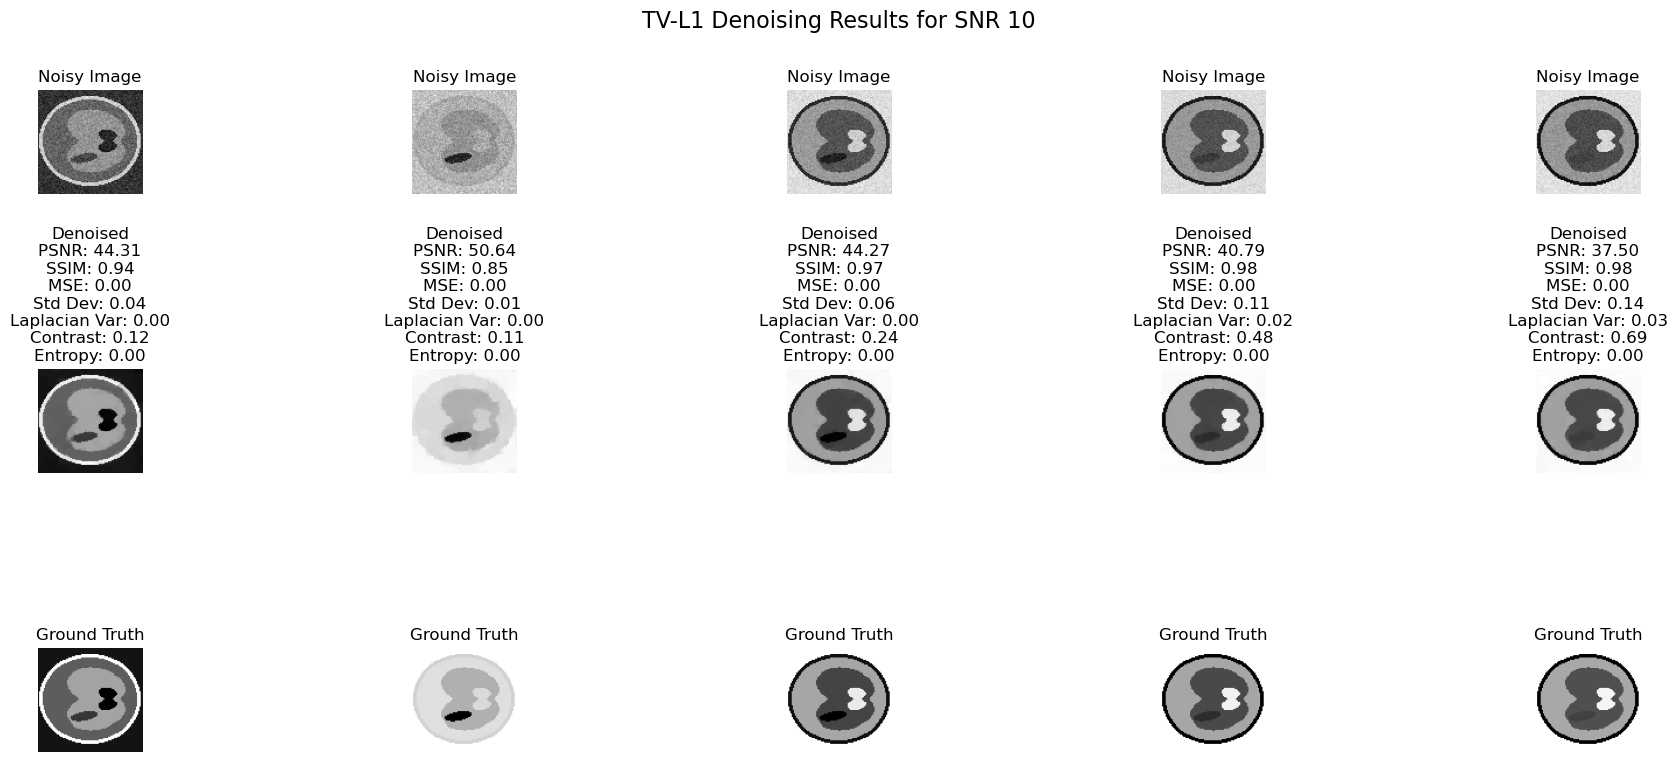

<Figure size 640x480 with 0 Axes>

325.60 325.86 293.28 268.17 254.53 245.23 237.52 233.27 228.23 224.29 222.14 219.59 216.94 215.41 213.85 212.70 211.80 210.27 209.55 208.46 207.55 207.31 206.34 205.91 205.38 204.81 204.58 204.12 203.83 203.48 203.13 202.94 202.63 202.34 202.16 201.92 201.80 201.62 201.45 201.21 201.08 200.96 200.78 200.62 200.60 200.40 200.26 200.12 200.16 200.08 199.91 199.97 199.82 199.66 199.62 199.59 199.54 199.50 199.40 199.34 199.21 199.23 199.20 199.16 199.16 199.07 199.02 198.96 198.86 198.96 198.86 198.77 198.73 198.76 198.71 198.66 198.58 198.55 198.54 198.51 198.52 198.56 198.48 198.43 198.35 198.34 198.39 198.36 198.30 198.29 198.27 198.23 198.22 198.20 198.23 198.16 198.15 198.16 198.20 198.08 
237.54 234.29 202.66 184.51 171.99 163.18 156.02 149.89 146.10 142.98 140.15 137.57 135.76 134.19 132.61 131.30 130.14 129.36 128.17 127.48 126.94 126.22 125.62 125.17 124.94 124.39 123.81 123.50 123.24 122.88 122.57 122.52 122.09 121.73 121.61 121.54 121.33 121.09 120.91 120.72 120.61 120.52 120.3

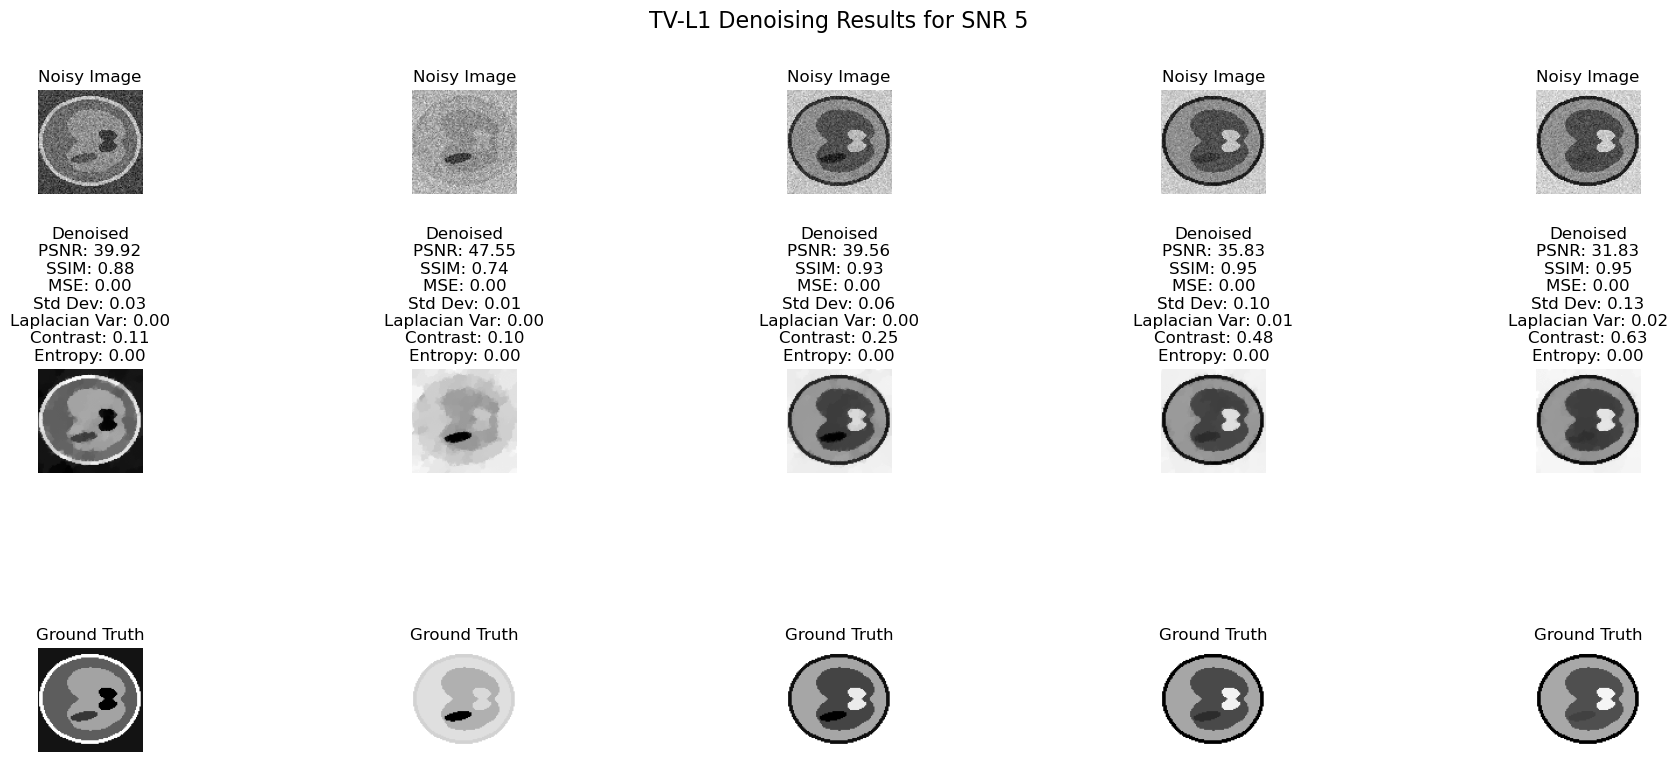

<Figure size 640x480 with 0 Axes>

370.07 379.55 340.33 310.12 292.27 282.85 274.04 266.73 261.80 257.74 253.52 251.19 248.27 246.69 244.51 243.27 241.71 240.77 239.21 238.56 237.69 236.98 236.38 235.58 235.09 234.47 234.44 233.47 233.26 232.94 232.58 232.18 231.86 231.72 231.34 231.22 230.91 230.79 230.61 230.43 230.25 230.08 230.03 229.84 229.67 229.65 229.52 229.41 229.30 229.05 229.22 229.01 228.97 228.81 228.74 228.66 228.67 228.59 228.52 228.42 228.32 228.37 228.30 228.26 228.18 228.08 228.11 228.06 228.04 228.01 227.96 227.92 227.93 227.83 227.84 227.80 227.70 227.74 227.70 227.65 227.59 227.64 227.63 227.57 227.50 227.50 227.51 227.44 227.46 227.42 227.41 227.41 227.40 227.35 227.31 227.37 227.38 227.28 227.26 227.29 
291.75 290.61 256.99 231.61 214.66 205.00 194.41 189.61 184.54 179.58 176.26 173.71 171.58 168.39 166.68 165.40 163.61 162.43 161.52 159.93 159.46 158.68 157.84 157.24 156.37 156.24 155.41 154.99 154.58 154.32 153.71 153.61 153.14 152.95 152.69 152.32 152.04 151.85 151.66 151.49 151.32 150.98 150.8

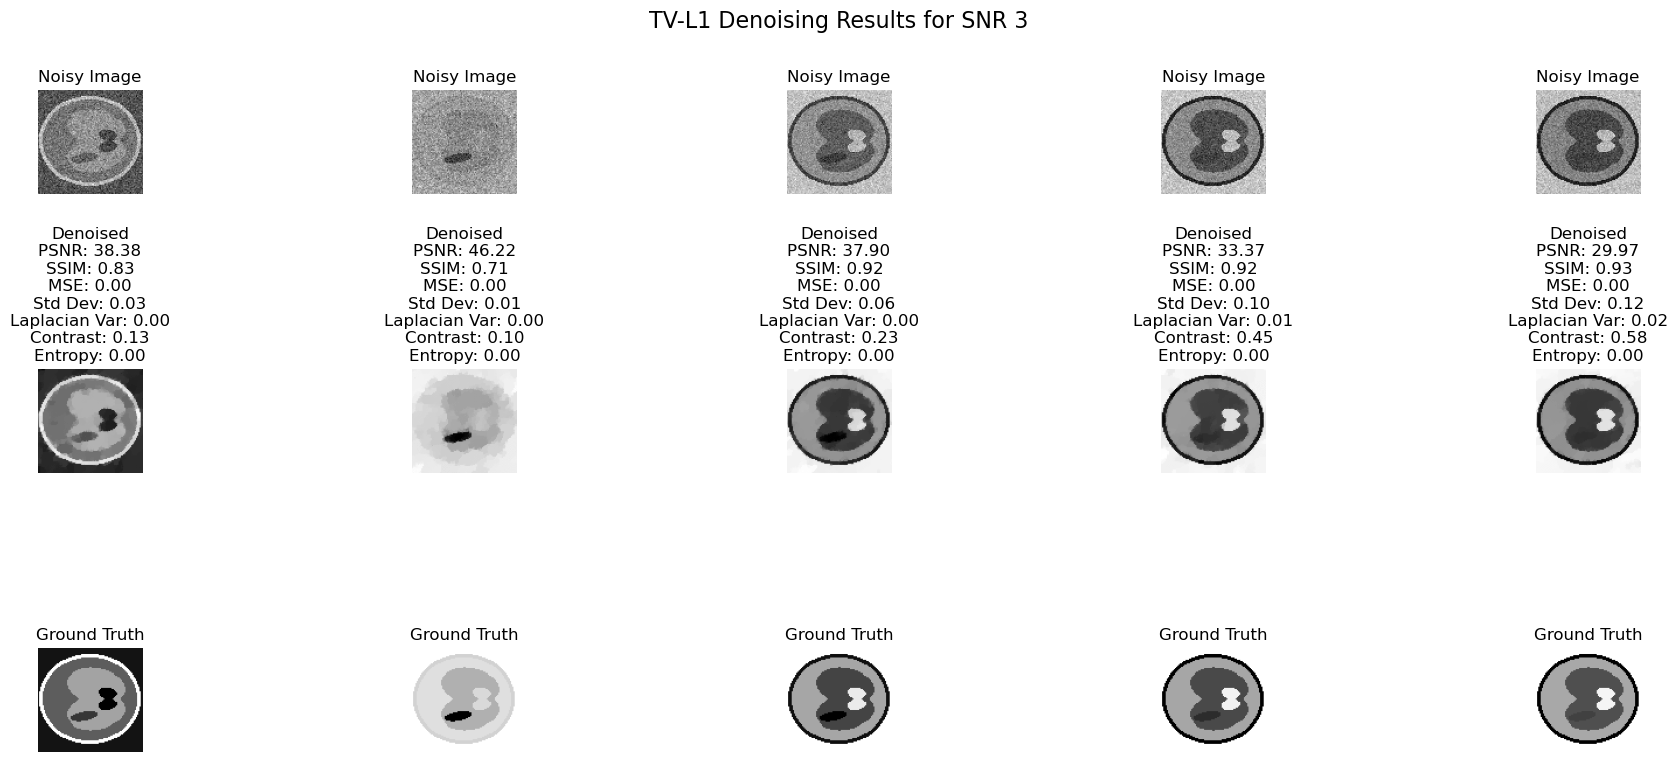

<Figure size 640x480 with 0 Axes>

415.83 443.38 400.35 363.54 342.45 331.28 320.49 312.38 305.63 301.28 296.42 294.15 290.17 287.81 285.59 283.61 281.89 280.81 279.62 278.69 277.25 276.62 275.88 275.14 274.26 273.64 273.29 273.01 272.27 271.79 271.66 271.19 271.02 270.80 270.41 270.24 269.75 269.64 269.50 269.31 269.15 268.89 268.75 268.48 268.55 268.34 268.05 268.10 267.95 268.01 267.68 267.48 267.58 267.52 267.41 267.31 267.25 267.36 267.13 266.97 266.98 266.98 266.92 266.81 266.81 266.88 266.71 266.66 266.67 266.59 266.53 266.59 266.54 266.52 266.49 266.45 266.44 266.37 266.33 266.33 266.29 266.28 266.31 266.31 266.19 266.15 266.16 266.16 266.14 266.06 266.14 266.13 266.05 265.93 265.98 266.06 265.99 265.92 266.02 266.01 
337.21 347.81 312.19 276.47 262.21 247.45 237.39 229.35 221.41 217.04 212.70 208.34 205.80 202.79 200.63 198.43 197.44 195.54 194.30 193.41 191.99 191.09 190.29 189.73 188.82 188.04 187.74 186.95 186.59 186.19 185.59 185.57 184.84 184.31 184.33 183.97 183.68 183.38 183.29 183.02 182.62 182.57 182.4

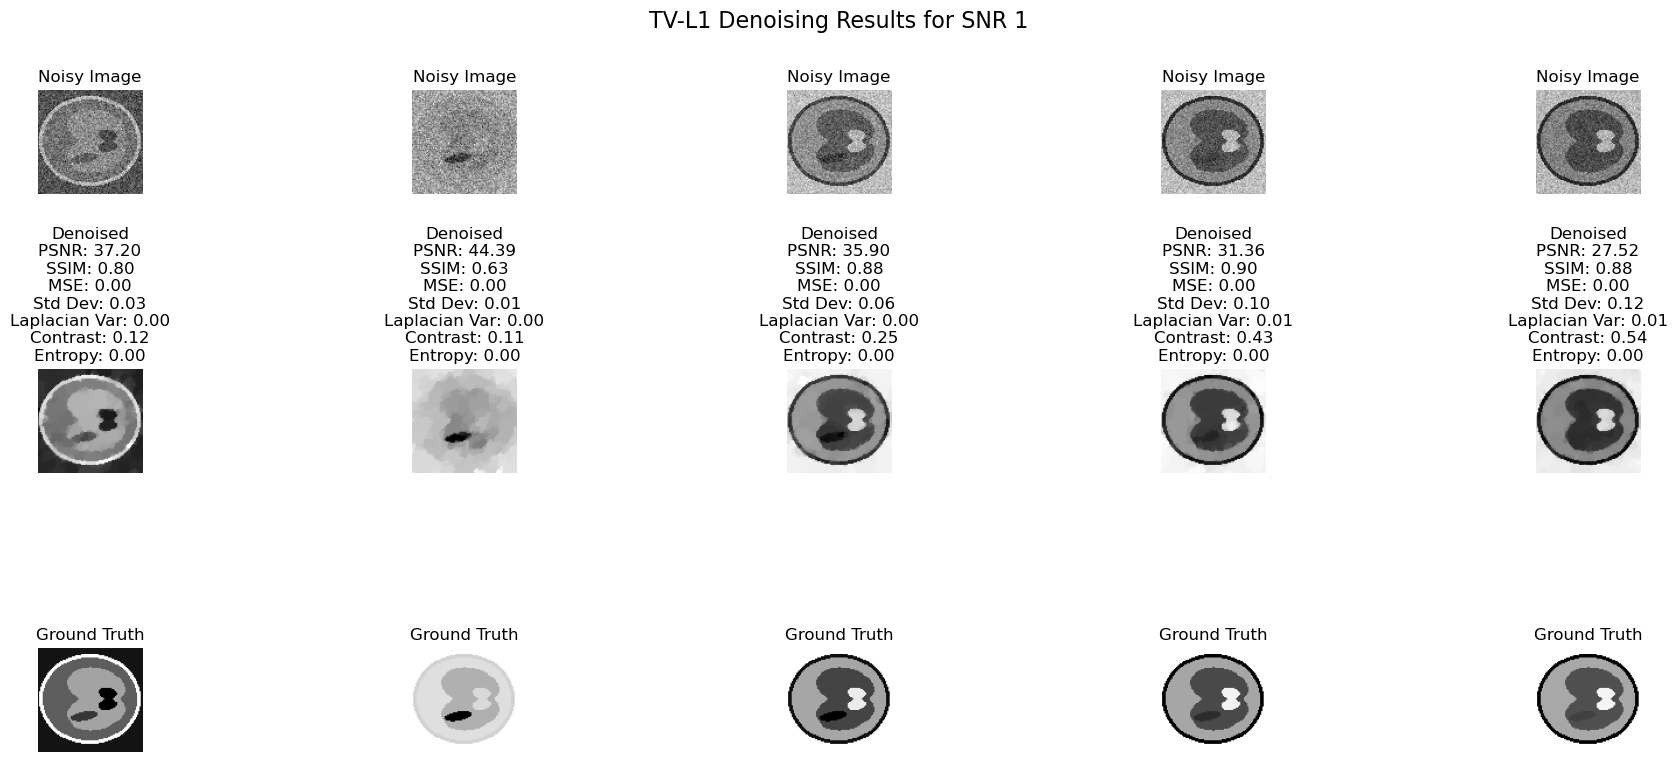

<Figure size 640x480 with 0 Axes>

446.68 493.33 441.36 400.12 377.83 362.47 351.01 342.64 336.64 329.63 326.18 322.32 318.18 316.34 314.24 311.64 309.93 308.60 307.15 305.94 305.21 303.93 303.55 302.45 301.80 300.95 300.17 300.21 299.35 298.88 298.51 298.18 297.95 297.47 297.13 296.67 296.44 296.30 295.88 295.82 295.72 295.42 295.13 294.95 294.88 294.59 294.51 294.40 294.20 294.20 294.00 293.94 293.84 293.63 293.64 293.52 293.41 293.43 293.23 293.21 293.13 293.09 293.10 293.01 292.94 292.80 292.84 292.73 292.66 292.63 292.57 292.58 292.58 292.48 292.46 292.47 292.35 292.35 292.38 292.21 292.21 292.29 292.26 292.24 292.15 292.13 292.13 292.03 292.05 292.06 292.02 291.97 291.96 292.03 291.97 291.95 291.89 291.87 291.91 291.82 
361.37 385.65 344.92 307.61 286.35 273.11 261.24 253.04 246.90 240.11 235.98 232.00 228.78 226.20 223.59 221.38 219.32 217.94 216.71 215.16 213.95 212.99 211.88 211.03 210.45 209.31 209.03 208.29 207.62 207.22 206.62 206.49 206.06 205.70 205.28 204.99 204.57 204.56 204.22 203.98 203.87 203.62 203.3

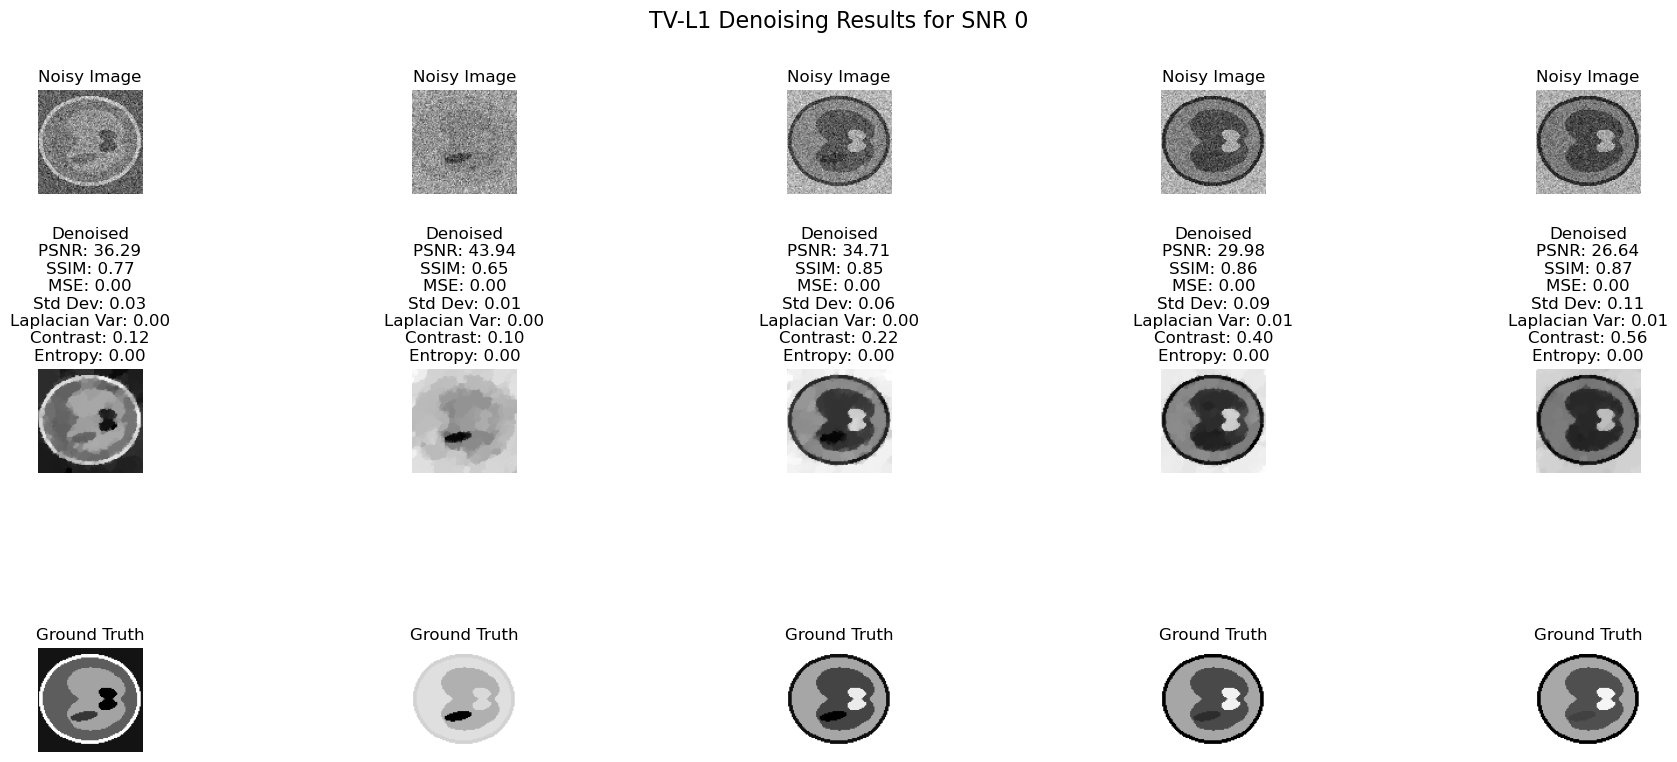

<Figure size 640x480 with 0 Axes>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from scipy.stats import entropy as scipy_entropy
from skimage.filters import laplace

import os





def compute_nr_iqa(image):
    """
    Calculates no-reference image quality assessment (NR-IQA) features for a given image.

    Args:
        image (np.ndarray): The grayscale image for which to calculate NR-IQA features.

    Returns:
        dict: A dictionary containing the calculated NR-IQA features:
            - Standard Deviation: Standard deviation of pixel intensity values.
            - Laplacian Variance: Variance of the Laplacian filter applied to the image.
            - Contrast (Michelson): Michelson contrast measure based on minimum and maximum intensities.
            - Entropy: Image entropy calculated using skimage.metrics.entropy.
    """

    std_dev = np.std(image)
    laplacian_img = laplace(image, ksize=3)  # Apply the Laplacian filter
    laplacian_var = np.var(laplacian_img)  # Compute the variance of the Laplacian
    contrast = (np.max(image) - np.min(image)) / (np.max(image) + np.min(image))
    # Calculate global entropy
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    prob_dist = hist / np.sum(hist)
    entropy_val = scipy_entropy(prob_dist, base=2)

    return {
        'Standard Deviation': std_dev,
        'Laplacian Variance': laplacian_var,
        'Contrast (Michelson)': contrast,
        'Entropy': entropy_val,
    }



def nabla(I):
    h, w = I.shape
    G = np.zeros((h, w, 2), I.dtype)
    G[:, :-1, 0] = I[:, 1:] - I[:, :-1]
    G[:-1, :, 1] = I[1:] - I[:-1]
    return G

def nablaT(G):
    h, w = G.shape[:2]
    I = np.zeros((h, w), G.dtype)
    I[:, :-1] -= G[:, :-1, 0]
    I[:, 1:] += G[:, :-1, 0]
    I[:-1] -= G[:-1, :, 1]
    I[1:] += G[:-1, :, 1]
    return I

def anorm(x):
    return np.sqrt((x**2).sum(-1))

def calc_energy_TVL1(X, observation, clambda):
    Ereg = anorm(nabla(X)).sum()
    Edata = clambda * np.abs(X - observation).sum()
    return Ereg + Edata
import numpy as np

def project_nd(P: np.ndarray, r: float) -> np.ndarray:
    '''
    Perform a pixel-wise projection onto R-radius balls.
    
    Parameters:
    P (np.ndarray): Input array.
    r (float): Radius of the projection.
    
    Returns:
    np.ndarray: Projected array.
    '''
    nP = np.maximum(1.0, anorm(P) / r)
    return P / nP[..., np.newaxis]
    
def shrink_1d(X: np.ndarray, F: np.ndarray, step: float) -> np.ndarray:
    '''
    Pixel-wise scalar shrinking.
    
    Parameters:
    X (np.ndarray): Input array.
    F (np.ndarray): Forward step array.
    step (float): Shrinkage step size.
    
    Returns:
    np.ndarray: Shrinked array.
    '''
    return X + np.clip(F - X, -step, step)


def solve_TVL1(img, clambda, iter_n=1000):
    L2 = 8.1
    tau = 0.025
    sigma = 1.0 / (L2 * tau)
    theta = 1.0
    X = img.copy()
    P = nabla(X)
    for i in range(iter_n):
        P = project_nd(P + sigma * nabla(X), 1.0)
        X1 = shrink_1d(X - tau * nablaT(P), img, clambda * tau)
        X = X1 + theta * (X1 - X)
        if i % 10 == 0:
            print("{:.2f}".format(calc_energy_TVL1(X, img, clambda)), end=' ')
    print()
    return X


snrs = [10, 5, 3, 1, 0]  # Signal-to-Noise Ratios

lambda_TVL1 = 1
# Iterate over each SNR level
for snr in snrs:
    # Load your data here
    mat = scipy.io.loadmat(f'./Experiments/SimulationMatlab/GroundTruth_rician_SNR{snr}.mat')
    mat_ground_truth = scipy.io.loadmat(f'./Experiments/SimulationMatlab/GroundTruth.mat')
    
    noisy_image_data = mat['data_rician']
    ground_truth_data = mat_ground_truth['data']

    # Set figure size for better visibility
    plt.figure(figsize=(20, 8))

    # Loop through each image in the dataset
    for j in range(noisy_image_data.shape[2]):
        noisy_image = noisy_image_data[:, :, j].squeeze()
        ground_truth_image = ground_truth_data[:, :, j].squeeze()

        # If images are 3D, convert to 2D by averaging the color channels
        if noisy_image.ndim == 3:
            noisy_image = np.mean(noisy_image, axis=2)
            ground_truth_image = np.mean(ground_truth_image, axis=2)

        # Apply TV-L1 denoising
        denoised_image = solve_TVL1(noisy_image, lambda_TVL1)

       # Compute the metrics
        image_ssim = ssim(ground_truth_image, denoised_image, data_range=ground_truth_image.max() - ground_truth_image.min())
        image_psnr = psnr(ground_truth_image, denoised_image)
        image_mse = mse(ground_truth_image, denoised_image)
        nr_iqa_metrics = compute_nr_iqa(denoised_image)
        # compute statistical metrics 




        # Plot Noisy Image
        plt.subplot(3, noisy_image_data.shape[2], j + 1)
        plt.imshow(noisy_image, cmap='gray')
        plt.title('Noisy Image')
        plt.axis('off')

        # Plot Denoised Image
        plt.subplot(3, noisy_image_data.shape[2], j + 1 + noisy_image_data.shape[2])
        plt.imshow(denoised_image, cmap='gray')
        plt.title(f'Denoised\nPSNR: {image_psnr:.2f}\nSSIM: {image_ssim:.2f}\nMSE: {image_mse:.2f}\nStd Dev: {nr_iqa_metrics["Standard Deviation"]:.2f}\nLaplacian Var: {nr_iqa_metrics["Laplacian Variance"]:.2f}\nContrast: {nr_iqa_metrics["Contrast (Michelson)"]:.2f}\nEntropy: {nr_iqa_metrics["Entropy"]:.2f}')
        plt.axis('off')

        plt.axis('off')

        # Plot Ground Truth Image
        plt.subplot(3, noisy_image_data.shape[2], j + 1 + 2 * noisy_image_data.shape[2])
        plt.imshow(ground_truth_image, cmap='gray')
        plt.title('Ground Truth')
        plt.axis('off')

    # Adjust layout
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.88)
    plt.suptitle(f'TV-L1 Denoising Results for SNR {snr}', fontsize=16)
    plt.show()

    # Adjust layout
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.88)
    plt.suptitle(f'TV-L1 Denoising Results for SNR {snr}', fontsize=16)
    plt.show()
